In [1]:
from IPython.display import display; from IPython.display import HTML; import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
import numpy as np; import pandas as pd; from __future__ import division 
import matplotlib as mpl; import matplotlib.pyplot as plt; 
%matplotlib inline
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# KMO wt
#  AP   (09) - FK503, FK504, FK536, FK537, FK544, FKalb177, FKalb179, FKalb202, FKalb230
#  Sham (07) - FK502, FK534, FK535, FK545, FKalb180, FKalb205, FKalb229

# KMO alb-cre
#  AP   (10) - Acre226, Acre235, Acre238, Acre241, Acre244, Acre246, Acre265, Acre272, Acre280, Acre281
#  Sham (07) - Acre227, Acre234, Acre243, Acre252, Acre253, Acre270, Acre282

In [4]:
dfFK502 = pd.read_csv('/Users/alastairhayes/Desktop/Paper_Final/Data/Figure3/Fig3E+3F-done/Fig3E3F_WT_sham/Fig3E3F_FK502/FK502.csv')
df1FK502 = dfFK502.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK502.datetime = pd.to_datetime(df1FK502.datetime, dayfirst=True)
df1FK502.ZT0 = pd.to_datetime(df1FK502.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK502 = df1FK502['act'].expanding(min_periods=1).sum()
ActSum_FK502.name = 'sumAct'
ActHund_FK502 = df1FK502['act']/100
ActHund_FK502.name = 'actHund'
#Create column with ZT
tXFK502 = df1FK502.datetime; tYFK502 = df1FK502.ZT0
deltaZTFK502 = tXFK502 - tYFK502
ZTFK502 = deltaZTFK502 / np.timedelta64(1, 'h')
ZTFK502.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK502 = pd.concat([df1FK502, ActSum_FK502, ZTFK502, ActHund_FK502], axis=1)
df3FK502 = df2FK502.drop(['ZT0'], axis=1)
df4FK502 = df3FK502.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK502 = df3FK502.set_index('datetime')
df_tempFK502 = DTindexdfFK502['temp']
df_actFK502 = DTindexdfFK502['act']
df_ActSum_FK502 = DTindexdfFK502['sumAct']
df_actHundFK502 = DTindexdfFK502['actHund']
df_ZTFK502 = DTindexdfFK502['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK502 = df_tempFK502.resample('60min').mean()
s2FK502 = df_actFK502.resample('60min').sum()
s3FK502 = df_actHundFK502.resample('60min').sum()
s4FK502 = df_ActSum_FK502.resample('60min').last()
s5FK502 = df_ZTFK502.resample('60min').first()
df5FK502 = pd.concat([s1FK502, s2FK502, s3FK502, s4FK502, s5FK502], axis=1); df5FK502.insert(3, 'Exp', 'Sham'); df5FK502.insert(4, 'ID', 'FK502')
df4FK502[23.99:24.02] #test

,temp,act,datetime,sumAct,actHund
ZT,,,,,
24.000000,37.91,2,2016-02-10 13:00:00,37533.0,0.02
24.016667,37.89,1,2016-02-10 13:01:00,37534.0,0.01


In [5]:


url = 'https://raw.githubusercontent.com/HayesAJ83/SurgicalEps_01/main/Eponyms4python_Lite.csv'
df1 = pd.read_csv(url, dtype={'PMID':str,'Year':int})
df1

,Alphabet,Eponym,Eponym_easy,Eponym_easy_yr,Topic,Disease,Eponym_strip,Who,Who_B,Surname,...,Journal_Spec,Description,WNI_link,Ref_site,Pubmed,Wiki_link,ICD11_link,TMS_link,Manufacturer,Eponymictionary
0,NaN,1,1,1,1,NaN,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Aaron sign,Aaron sign,1913 - Aaron sign,General Surgery,"Appendicitis,Abdominal Pain",Aaron,Charles Dettie Aaron,**Charles Dettie Aaron**,Aaron,...,General Surgery,"Aaron's sign, indicitive of **chronic appendic...",https://www.whonamedit.com/synd.cfm/341.html,https://jamanetwork.com/journals/jama/fullarti...,NaN,https://en.wikipedia.org/wiki/Aaron%27s_sign,NaN,NaN,NaN,NaN
2,A,"Adamkiewicz, Artery of",Artery of Adamkiewicz,1881 - Artery of Adamkiewicz,"Vascular,Neurosurgery,Radiology","Spinal Cord Injury,Ischaemia",Adamkiewicz,Albert Wojciech Adamkiewicz,**Albert Wojciech Adamkiewicz**,Adamkiewicz,...,NaN,The _artery of Adamkiewicz_ is known by other ...,http://www.whonamedit.com/synd.cfm/2233.html,NaN,NaN,https://en.wikipedia.org/wiki/Artery_of_Adamki...,NaN,NaN,NaN,NaN
3,A,Alcock's canal,Alcock's canal,1836 - Alcock's canal,"Urology,Colorectal,Gynaecology,Obstetrics","Palsy,Paralysis",Alcock,Benjamin Alcock,**Benjamin Alcock**,Alcock,...,NaN,Alcock's canal is an eponymous term for the **...,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Pudendal_canal,NaN,NaN,NaN,NaN
4,A,Allis forceps,Allis forceps,1883 - Allis forceps,General Surgery,NaN,Allis,Oscar Huntington Allis,**Oscar Huntington Allis**,Allis,...,NaN,"The Allis forceps, also called an Allis clamp,...",NaN,NaN,NaN,https://en.wikipedia.org/wiki/Allis_clamp,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Z,Zadik's procedure,Zadik's procedure,1950 - Zadik's procedure,General Surgery,Ingrowning Nail,Zadik,FR Zadik,**FR Zadik**,Zadik,...,NaN,Frequently refered to as Zadak's or Zadek's pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,Z,Zargar's classification,Zargar's classification,1991 - Zargar's classification,"Oesophagogastric,Emergency Surgery","Corrosive Ingestion,Dysphagia,Dyspepsia,",Zargar,Showkat Ali Zargar,**Showkat Ali Zargar**,Zargar,...,NaN,NaN,NaN,NaN,https://pubmed.ncbi.nlm.nih.gov/2032601/,NaN,NaN,NaN,NaN,NaN
354,Z,Zenker's diverticulum,Zenker's diverticulum,1867 - Zenker's diverticulum,Oesophagogastric,Dysphagia,Zenker,Friedrich Albert von Zenker,**Friedrich Albert von Zenker**,Zenker,...,"Oesophagogastric,All",Zenker's report was based on 5 personal cases ...,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Zenker%27s_diver...,NaN,NaN,NaN,NaN
355,Z,Zollinger-Ellison syndrome,Zollinger-Ellison syndrome,1955 - Zollinger-Ellison syndrome,"Oesophagogastric,HPB","Peptic Ulcer Disease,Abdominal Pain,",Zollinger-Ellison,Robert Milton Zollinger,**Robert Milton Zollinger** & **Edwin Homer El...,Zollinger,...,"Oesophagogastric,HPB,All",NaN,https://www.whonamedit.com/synd.cfm/3074.html,NaN,https://pubmed.ncbi.nlm.nih.gov/13259432/,https://en.wikipedia.org/wiki/Zollinger–Elliso...,https://icd.who.int/browse11/l-m/en#/http://id...,NaN,NaN,NaN


In [5]:
dfFK503 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK503/FK503.csv')
df1FK503 = dfFK503.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK503.datetime = pd.to_datetime(df1FK503.datetime, dayfirst=True)
df1FK503.ZT0 = pd.to_datetime(df1FK503.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK503 = df1FK503['act'].expanding(min_periods=1).sum()
ActSum_FK503.name = 'sumAct'
ActHund_FK503 = df1FK503['act']/100
ActHund_FK503.name = 'actHund'
#Create column with ZT
tXFK503 = df1FK503.datetime; tYFK503 = df1FK503.ZT0
deltaZTFK503 = tXFK503 - tYFK503
ZTFK503 = deltaZTFK503 / np.timedelta64(1, 'h')
ZTFK503.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK503 = pd.concat([df1FK503, ActSum_FK503, ZTFK503, ActHund_FK503], axis=1)
df3FK503 = df2FK503.drop(['ZT0'], axis=1)
df4FK503 = df3FK503.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK503 = df3FK503.set_index('datetime')
df_tempFK503 = DTindexdfFK503['temp']
df_actFK503 = DTindexdfFK503['act']
df_ActSum_FK503 = DTindexdfFK503['sumAct']
df_actHundFK503 = DTindexdfFK503['actHund']
df_ZTFK503 = DTindexdfFK503['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK503 = df_tempFK503.resample('60min').mean()
s2FK503 = df_actFK503.resample('60min').sum()
s3FK503 = df_actHundFK503.resample('60min').sum()
s4FK503 = df_ActSum_FK503.resample('60min').last()
s5FK503 = df_ZTFK503.resample('60min').first()
df5FK503 = pd.concat([s1FK503, s2FK503, s3FK503, s4FK503, s5FK503], axis=1); df5FK503.insert(3, 'Exp', 'AP'); df5FK503.insert(4, 'ID', 'FK503')
df5FK503.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-02-09 13:00:00,36.318833,2368,23.68,AP,FK503,2368.0,0.0


In [6]:
dfFK504 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK504/FK504.csv')
df1FK504 = dfFK504.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK504.datetime = pd.to_datetime(df1FK504.datetime, dayfirst=True)
df1FK504.ZT0 = pd.to_datetime(df1FK504.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK504 = df1FK504['act'].expanding(min_periods=1).sum()
ActSum_FK504.name = 'sumAct'
ActHund_FK504 = df1FK504['act']/100
ActHund_FK504.name = 'actHund'
#Create column with ZT
tXFK504 = df1FK504.datetime; tYFK504 = df1FK504.ZT0
deltaZTFK504 = tXFK504 - tYFK504
ZTFK504 = deltaZTFK504 / np.timedelta64(1, 'h')
ZTFK504.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK504 = pd.concat([df1FK504, ActSum_FK504, ZTFK504, ActHund_FK504], axis=1)
df3FK504 = df2FK504.drop(['ZT0'], axis=1)
df4FK504 = df3FK504.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK504 = df3FK504.set_index('datetime')
df_tempFK504 = DTindexdfFK504['temp']
df_actFK504 = DTindexdfFK504['act']
df_ActSum_FK504 = DTindexdfFK504['sumAct']
df_actHundFK504 = DTindexdfFK504['actHund']
df_ZTFK504 = DTindexdfFK504['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK504 = df_tempFK504.resample('60min').mean()
s2FK504 = df_actFK504.resample('60min').sum()
s3FK504 = df_actHundFK504.resample('60min').sum()
s4FK504 = df_ActSum_FK504.resample('60min').last()
s5FK504 = df_ZTFK504.resample('60min').first()
df5FK504 = pd.concat([s1FK504, s2FK504, s3FK504, s4FK504, s5FK504], axis=1); df5FK504.insert(3, 'Exp', 'AP'); df5FK504.insert(4, 'ID', 'FK504')
df5FK504.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-02-09 13:00:00,35.2545,2685,26.85,AP,FK504,2685.0,0.0


In [7]:
dfFK534 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK534/FK534.csv')
df1FK534 = dfFK534.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK534.datetime = pd.to_datetime(df1FK534.datetime, dayfirst=True)
df1FK534.ZT0 = pd.to_datetime(df1FK534.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK534 = df1FK534['act'].expanding(min_periods=1).sum()
ActSum_FK534.name = 'sumAct'
ActHund_FK534 = df1FK534['act']/100
ActHund_FK534.name = 'actHund'
#Create column with ZT
tXFK534 = df1FK534.datetime; tYFK534 = df1FK534.ZT0
deltaZTFK534 = tXFK534 - tYFK534
ZTFK534 = deltaZTFK534 / np.timedelta64(1, 'h')
ZTFK534.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK534 = pd.concat([df1FK534, ActSum_FK534, ZTFK534, ActHund_FK534], axis=1)
df3FK534 = df2FK534.drop(['ZT0'], axis=1)
df4FK534 = df3FK534.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK534 = df3FK534.set_index('datetime')
df_tempFK534 = DTindexdfFK534['temp']
df_actFK534 = DTindexdfFK534['act']
df_ActSum_FK534 = DTindexdfFK534['sumAct']
df_actHundFK534 = DTindexdfFK534['actHund']
df_ZTFK534 = DTindexdfFK534['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK534 = df_tempFK534.resample('60min').mean()
s2FK534 = df_actFK534.resample('60min').sum()
s3FK534 = df_actHundFK534.resample('60min').sum()
s4FK534 = df_ActSum_FK534.resample('60min').last()
s5FK534 = df_ZTFK534.resample('60min').first()
df5FK534 = pd.concat([s1FK534, s2FK534, s3FK534, s4FK534, s5FK534], axis=1); df5FK534.insert(3, 'Exp', 'Sham'); df5FK534.insert(4, 'ID', 'FK534')
df5FK534.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-05-31 13:00:00,37.253167,2768,27.68,Sham,FK534,2768.0,0.0


In [8]:
dfFK535 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK535/FK535.csv')
df1FK535 = dfFK535.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK535.datetime = pd.to_datetime(df1FK535.datetime, dayfirst=True)
df1FK535.ZT0 = pd.to_datetime(df1FK535.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK535 = df1FK535['act'].expanding(min_periods=1).sum()
ActSum_FK535.name = 'sumAct'
ActHund_FK535 = df1FK535['act']/100
ActHund_FK535.name = 'actHund'
#Create column with ZT
tXFK535 = df1FK535.datetime; tYFK535 = df1FK535.ZT0
deltaZTFK535 = tXFK535 - tYFK535
ZTFK535 = deltaZTFK535 / np.timedelta64(1, 'h')
ZTFK535.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK535 = pd.concat([df1FK535, ActSum_FK535, ZTFK535, ActHund_FK535], axis=1)
df3FK535 = df2FK535.drop(['ZT0'], axis=1)
df4FK535 = df3FK535.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK535 = df3FK535.set_index('datetime')
df_tempFK535 = DTindexdfFK535['temp']
df_actFK535 = DTindexdfFK535['act']
df_ActSum_FK535 = DTindexdfFK535['sumAct']
df_actHundFK535 = DTindexdfFK535['actHund']
df_ZTFK535 = DTindexdfFK535['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK535 = df_tempFK535.resample('60min').mean()
s2FK535 = df_actFK535.resample('60min').sum()
s3FK535 = df_actHundFK535.resample('60min').sum()
s4FK535 = df_ActSum_FK535.resample('60min').last()
s5FK535 = df_ZTFK535.resample('60min').first()
df5FK535 = pd.concat([s1FK535, s2FK535, s3FK535, s4FK535, s5FK535], axis=1); df5FK535.insert(3, 'Exp', 'Sham'); df5FK535.insert(4, 'ID', 'FK535')
df5FK535.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-05-31 13:00:00,35.531186,1580,15.8,Sham,FK535,1580.0,0.0


In [9]:
dfFK536 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK536/FK536.csv')
df1FK536 = dfFK536.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK536.datetime = pd.to_datetime(df1FK536.datetime, dayfirst=True)
df1FK536.ZT0 = pd.to_datetime(df1FK536.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK536 = df1FK536['act'].expanding(min_periods=1).sum()
ActSum_FK536.name = 'sumAct'
ActHund_FK536 = df1FK536['act']/100
ActHund_FK536.name = 'actHund'
#Create column with ZT
tXFK536 = df1FK536.datetime; tYFK536 = df1FK536.ZT0
deltaZTFK536 = tXFK536 - tYFK536
ZTFK536 = deltaZTFK536 / np.timedelta64(1, 'h')
ZTFK536.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK536 = pd.concat([df1FK536, ActSum_FK536, ZTFK536, ActHund_FK536], axis=1)
df3FK536 = df2FK536.drop(['ZT0'], axis=1)
df4FK536 = df3FK536.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK536 = df3FK536.set_index('datetime')
df_tempFK536 = DTindexdfFK536['temp']
df_actFK536 = DTindexdfFK536['act']
df_ActSum_FK536 = DTindexdfFK536['sumAct']
df_actHundFK536 = DTindexdfFK536['actHund']
df_ZTFK536 = DTindexdfFK536['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK536 = df_tempFK536.resample('60min').mean()
s2FK536 = df_actFK536.resample('60min').sum()
s3FK536 = df_actHundFK536.resample('60min').sum()
s4FK536 = df_ActSum_FK536.resample('60min').last()
s5FK536 = df_ZTFK536.resample('60min').first()
df5FK536 = pd.concat([s1FK536, s2FK536, s3FK536, s4FK536, s5FK536], axis=1); df5FK536.insert(3, 'Exp', 'AP'); df5FK536.insert(4, 'ID', 'FK536')
df5FK536.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-05-31 13:00:00,36.714,2894,28.94,AP,FK536,2894.0,0.0


In [10]:
dfFK537 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK537/FK537.csv')
df1FK537 = dfFK537.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK537.datetime = pd.to_datetime(df1FK537.datetime, dayfirst=True)
df1FK537.ZT0 = pd.to_datetime(df1FK537.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK537 = df1FK537['act'].expanding(min_periods=1).sum()
ActSum_FK537.name = 'sumAct'
ActHund_FK537 = df1FK537['act']/100
ActHund_FK537.name = 'actHund'
#Create column with ZT
tXFK537 = df1FK537.datetime; tYFK537 = df1FK537.ZT0
deltaZTFK537 = tXFK537 - tYFK537
ZTFK537 = deltaZTFK537 / np.timedelta64(1, 'h')
ZTFK537.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK537 = pd.concat([df1FK537, ActSum_FK537, ZTFK537, ActHund_FK537], axis=1)
df3FK537 = df2FK537.drop(['ZT0'], axis=1)
df4FK537 = df3FK537.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK537 = df3FK537.set_index('datetime')
df_tempFK537 = DTindexdfFK537['temp']
df_actFK537 = DTindexdfFK537['act']
df_ActSum_FK537 = DTindexdfFK537['sumAct']
df_actHundFK537 = DTindexdfFK537['actHund']
df_ZTFK537 = DTindexdfFK537['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK537 = df_tempFK537.resample('60min').mean()
s2FK537 = df_actFK537.resample('60min').sum()
s3FK537 = df_actHundFK537.resample('60min').sum()
s4FK537 = df_ActSum_FK537.resample('60min').last()
s5FK537 = df_ZTFK537.resample('60min').first()
df5FK537 = pd.concat([s1FK537, s2FK537, s3FK537, s4FK537, s5FK537], axis=1); df5FK537.insert(3, 'Exp', 'AP'); df5FK537.insert(4, 'ID', 'FK537')
df5FK537.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-05-31 13:00:00,36.005333,2525,25.25,AP,FK537,2525.0,0.0


In [11]:
dfFK544 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK544/FK544.csv')
df1FK544 = dfFK544.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK544.datetime = pd.to_datetime(df1FK544.datetime, dayfirst=True)
df1FK544.ZT0 = pd.to_datetime(df1FK544.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK544 = df1FK544['act'].expanding(min_periods=1).sum()
ActSum_FK544.name = 'sumAct'
ActHund_FK544 = df1FK544['act']/100
ActHund_FK544.name = 'actHund'
#Create column with ZT
tXFK544 = df1FK544.datetime; tYFK544 = df1FK544.ZT0
deltaZTFK544 = tXFK544 - tYFK544
ZTFK544 = deltaZTFK544 / np.timedelta64(1, 'h')
ZTFK544.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK544 = pd.concat([df1FK544, ActSum_FK544, ZTFK544, ActHund_FK544], axis=1)
df3FK544 = df2FK544.drop(['ZT0'], axis=1)
df4FK544 = df3FK544.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK544 = df3FK544.set_index('datetime')
df_tempFK544 = DTindexdfFK544['temp']
df_actFK544 = DTindexdfFK544['act']
df_ActSum_FK544 = DTindexdfFK544['sumAct']
df_actHundFK544 = DTindexdfFK544['actHund']
df_ZTFK544 = DTindexdfFK544['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK544 = df_tempFK544.resample('60min').mean()
s2FK544 = df_actFK544.resample('60min').sum()
s3FK544 = df_actHundFK544.resample('60min').sum()
s4FK544 = df_ActSum_FK544.resample('60min').last()
s5FK544 = df_ZTFK544.resample('60min').first()
df5FK544 = pd.concat([s1FK544, s2FK544, s3FK544, s4FK544,s5FK544], axis=1); df5FK544.insert(3, 'Exp', 'AP'); df5FK544.insert(4, 'ID', 'FK544')
df5FK544.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-06-23 13:00:00,36.132,747.0,7.47,AP,FK544,747.0,0.0


In [12]:
dfFK545 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FK545/FK545.csv')
df1FK545 = dfFK545.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FK545.datetime = pd.to_datetime(df1FK545.datetime, dayfirst=True)
df1FK545.ZT0 = pd.to_datetime(df1FK545.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FK545 = df1FK545['act'].expanding(min_periods=1).sum()
ActSum_FK545.name = 'sumAct'
ActHund_FK545 = df1FK545['act']/100
ActHund_FK545.name = 'actHund'
#Create column with ZT
tXFK545 = df1FK545.datetime; tYFK545 = df1FK545.ZT0
deltaZTFK545 = tXFK545 - tYFK545
ZTFK545 = deltaZTFK545 / np.timedelta64(1, 'h')
ZTFK545.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FK545 = pd.concat([df1FK545, ActSum_FK545, ZTFK545, ActHund_FK545], axis=1)
df3FK545 = df2FK545.drop(['ZT0'], axis=1)
df4FK545 = df3FK545.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFK545 = df3FK545.set_index('datetime')
df_tempFK545 = DTindexdfFK545['temp']
df_actFK545 = DTindexdfFK545['act']
df_ActSum_FK545 = DTindexdfFK545['sumAct']
df_actHundFK545 = DTindexdfFK545['actHund']
df_ZTFK545 = DTindexdfFK545['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FK545 = df_tempFK545.resample('60min').mean()
s2FK545 = df_actFK545.resample('60min').sum()
s3FK545 = df_actHundFK545.resample('60min').sum()
s4FK545 = df_ActSum_FK545.resample('60min').last()
s5FK545 = df_ZTFK545.resample('60min').first()
df5FK545 = pd.concat([s1FK545, s2FK545, s3FK545, s4FK545, s5FK545], axis=1); df5FK545.insert(3, 'Exp', 'Sham'); df5FK545.insert(4, 'ID', 'FK545')
df5FK545.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-06-23 13:00:00,35.990333,3234.0,32.34,Sham,FK545,3234.0,0.0


In [13]:
dfFKalb177 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FKalb177/FKalb177.csv')
df1FKalb177 = dfFKalb177.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb177.datetime = pd.to_datetime(df1FKalb177.datetime, dayfirst=True)
df1FKalb177.ZT0 = pd.to_datetime(df1FKalb177.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb177 = df1FKalb177['act'].expanding(min_periods=1).sum()
ActSum_FKalb177.name = 'sumAct'
ActHund_FKalb177 = df1FKalb177['act']/100
ActHund_FKalb177.name = 'actHund'
#Create column with ZT
tXFKalb177 = df1FKalb177.datetime; tYFKalb177 = df1FKalb177.ZT0
deltaZTFKalb177 = tXFKalb177 - tYFKalb177
ZTFKalb177 = deltaZTFKalb177 / np.timedelta64(1, 'h')
ZTFKalb177.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb177 = pd.concat([df1FKalb177, ActSum_FKalb177, ZTFKalb177, ActHund_FKalb177], axis=1)
df3FKalb177 = df2FKalb177.drop(['ZT0'], axis=1)
df4FKalb177 = df3FKalb177.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb177 = df3FKalb177.set_index('datetime')
df_tempFKalb177 = DTindexdfFKalb177['temp']
df_actFKalb177 = DTindexdfFKalb177['act']
df_ActSum_FKalb177 = DTindexdfFKalb177['sumAct']
df_actHundFKalb177 = DTindexdfFKalb177['actHund']
df_ZTFKalb177 = DTindexdfFKalb177['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb177 = df_tempFKalb177.resample('60min').mean()
s2FKalb177 = df_actFKalb177.resample('60min').sum()
s3FKalb177 = df_actHundFKalb177.resample('60min').sum()
s4FKalb177 = df_ActSum_FKalb177.resample('60min').last()
s5FKalb177 = df_ZTFKalb177.resample('60min').first()
df5FKalb177 = pd.concat([s1FKalb177, s2FKalb177, s3FKalb177, s4FKalb177, s5FKalb177], axis=1); df5FKalb177.insert(3, 'Exp', 'AP'); df5FKalb177.insert(4, 'ID', 'FKalb177')
df5FKalb177.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-04-20 13:00:00,35.6605,2311.0,23.11,AP,FKalb177,2311.0,0.0


In [14]:
dfFKalb179 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FKalb179/FKalb179.csv')
df1FKalb179 = dfFKalb179.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb179.datetime = pd.to_datetime(df1FKalb179.datetime, dayfirst=True)
df1FKalb179.ZT0 = pd.to_datetime(df1FKalb179.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb179 = df1FKalb179['act'].expanding(min_periods=1).sum()
ActSum_FKalb179.name = 'sumAct'
ActHund_FKalb179 = df1FKalb179['act']/100
ActHund_FKalb179.name = 'actHund'
#Create column with ZT
tXFKalb179 = df1FKalb179.datetime; tYFKalb179 = df1FKalb179.ZT0
deltaZTFKalb179 = tXFKalb179 - tYFKalb179
ZTFKalb179 = deltaZTFKalb179 / np.timedelta64(1, 'h')
ZTFKalb179.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb179 = pd.concat([df1FKalb179, ActSum_FKalb179, ZTFKalb179, ActHund_FKalb179], axis=1)
df3FKalb179 = df2FKalb179.drop(['ZT0'], axis=1)
df4FKalb179 = df3FKalb179.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb179 = df3FKalb179.set_index('datetime')
df_tempFKalb179 = DTindexdfFKalb179['temp']
df_actFKalb179 = DTindexdfFKalb179['act']
df_ActSum_FKalb179 = DTindexdfFKalb179['sumAct']
df_actHundFKalb179 = DTindexdfFKalb179['actHund']
df_ZTFKalb179 = DTindexdfFKalb179['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb179 = df_tempFKalb179.resample('60min').mean()
s2FKalb179 = df_actFKalb179.resample('60min').sum()
s3FKalb179 = df_actHundFKalb179.resample('60min').sum()
s4FKalb179 = df_ActSum_FKalb179.resample('60min').last()
s5FKalb179 = df_ZTFKalb179.resample('60min').first()
df5FKalb179 = pd.concat([s1FKalb179, s2FKalb179, s3FKalb179, s4FKalb179, s5FKalb179], axis=1); df5FKalb179.insert(3, 'Exp', 'AP'); df5FKalb179.insert(4, 'ID', 'FKalb179')
df5FKalb179.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-04-20 13:00:00,36.667,1735.0,17.35,AP,FKalb179,1735.0,0.0


In [15]:
dfFKalb180 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FKalb180/FKalb180.csv')
df1FKalb180 = dfFKalb180.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb180.datetime = pd.to_datetime(df1FKalb180.datetime, dayfirst=True)
df1FKalb180.ZT0 = pd.to_datetime(df1FKalb180.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb180 = df1FKalb180['act'].expanding(min_periods=1).sum()
ActSum_FKalb180.name = 'sumAct'
ActHund_FKalb180 = df1FKalb180['act']/100
ActHund_FKalb180.name = 'actHund'
#Create column with ZT
tXFKalb180 = df1FKalb180.datetime; tYFKalb180 = df1FKalb180.ZT0
deltaZTFKalb180 = tXFKalb180 - tYFKalb180
ZTFKalb180 = deltaZTFKalb180 / np.timedelta64(1, 'h')
ZTFKalb180.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb180 = pd.concat([df1FKalb180, ActSum_FKalb180, ZTFKalb180, ActHund_FKalb180], axis=1)
df3FKalb180 = df2FKalb180.drop(['ZT0'], axis=1)
df4FKalb180 = df3FKalb180.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb180 = df3FKalb180.set_index('datetime')
df_tempFKalb180 = DTindexdfFKalb180['temp']
df_actFKalb180 = DTindexdfFKalb180['act']
df_ActSum_FKalb180 = DTindexdfFKalb180['sumAct']
df_actHundFKalb180 = DTindexdfFKalb180['actHund']
df_ZTFKalb180 = DTindexdfFKalb180['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb180 = df_tempFKalb180.resample('60min').mean()
s2FKalb180 = df_actFKalb180.resample('60min').sum()
s3FKalb180 = df_actHundFKalb180.resample('60min').sum()
s4FKalb180 = df_ActSum_FKalb180.resample('60min').last()
s5FKalb180 = df_ZTFKalb180.resample('60min').first()
df5FKalb180 = pd.concat([s1FKalb180, s2FKalb180, s3FKalb180, s4FKalb180, s5FKalb180], axis=1); df5FKalb180.insert(3, 'Exp', 'Sham'); df5FKalb180.insert(4, 'ID', 'FKalb180')
df5FKalb180.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-04-20 13:00:00,36.8395,2785,27.85,Sham,FKalb180,2785.0,0.0


In [16]:
dfFKalb202 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FKalb202/FKalb202.csv')
df1FKalb202 = dfFKalb202.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb202.datetime = pd.to_datetime(df1FKalb202.datetime, dayfirst=True)
df1FKalb202.ZT0 = pd.to_datetime(df1FKalb202.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb202 = df1FKalb202['act'].expanding(min_periods=1).sum()
ActSum_FKalb202.name = 'sumAct'
ActHund_FKalb202 = df1FKalb202['act']/100
ActHund_FKalb202.name = 'actHund'
#Create column with ZT
tXFKalb202 = df1FKalb202.datetime; tYFKalb202 = df1FKalb202.ZT0
deltaZTFKalb202 = tXFKalb202 - tYFKalb202
ZTFKalb202 = deltaZTFKalb202 / np.timedelta64(1, 'h')
ZTFKalb202.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb202 = pd.concat([df1FKalb202, ActSum_FKalb202, ZTFKalb202, ActHund_FKalb202], axis=1)
df3FKalb202 = df2FKalb202.drop(['ZT0'], axis=1)
df4FKalb202 = df3FKalb202.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb202 = df3FKalb202.set_index('datetime')
df_tempFKalb202 = DTindexdfFKalb202['temp']
df_actFKalb202 = DTindexdfFKalb202['act']
df_ActSum_FKalb202 = DTindexdfFKalb202['sumAct']
df_actHundFKalb202 = DTindexdfFKalb202['actHund']
df_ZTFKalb202 = DTindexdfFKalb202['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb202 = df_tempFKalb202.resample('60min').mean()
s2FKalb202 = df_actFKalb202.resample('60min').sum()
s3FKalb202 = df_actHundFKalb202.resample('60min').sum()
s4FKalb202 = df_ActSum_FKalb202.resample('60min').last()
s5FKalb202 = df_ZTFKalb202.resample('60min').first()
df5FKalb202 = pd.concat([s1FKalb202, s2FKalb202, s3FKalb202, s4FKalb202, s5FKalb202], axis=1); df5FKalb202.insert(3, 'Exp', 'AP'); df5FKalb202.insert(4, 'ID', 'FKalb202')
df5FKalb202.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-06-16 13:00:00,36.161207,688.0,6.88,AP,FKalb202,688.0,0.0


In [17]:
dfFKalb205 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FKalb205/FKalb205.csv')
df1FKalb205 = dfFKalb205.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb205.datetime = pd.to_datetime(df1FKalb205.datetime, dayfirst=True)
df1FKalb205.ZT0 = pd.to_datetime(df1FKalb205.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb205 = df1FKalb205['act'].expanding(min_periods=1).sum()
ActSum_FKalb205.name = 'sumAct'
ActHund_FKalb205 = df1FKalb205['act']/100
ActHund_FKalb205.name = 'actHund'
#Create column with ZT
tXFKalb205 = df1FKalb205.datetime; tYFKalb205 = df1FKalb205.ZT0
deltaZTFKalb205 = tXFKalb205 - tYFKalb205
ZTFKalb205 = deltaZTFKalb205 / np.timedelta64(1, 'h')
ZTFKalb205.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb205 = pd.concat([df1FKalb205, ActSum_FKalb205, ZTFKalb205, ActHund_FKalb205], axis=1)
df3FKalb205 = df2FKalb205.drop(['ZT0'], axis=1)
df4FKalb205 = df3FKalb205.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb205 = df3FKalb205.set_index('datetime')
df_tempFKalb205 = DTindexdfFKalb205['temp']
df_actFKalb205 = DTindexdfFKalb205['act']
df_ActSum_FKalb205 = DTindexdfFKalb205['sumAct']
df_actHundFKalb205 = DTindexdfFKalb205['actHund']
df_ZTFKalb205 = DTindexdfFKalb205['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb205 = df_tempFKalb205.resample('60min').mean()
s2FKalb205 = df_actFKalb205.resample('60min').sum()
s3FKalb205 = df_actHundFKalb205.resample('60min').sum()
s4FKalb205 = df_ActSum_FKalb205.resample('60min').last()
s5FKalb205 = df_ZTFKalb205.resample('60min').first()
df5FKalb205 = pd.concat([s1FKalb205, s2FKalb205, s3FKalb205, s4FKalb205, s5FKalb205], axis=1); df5FKalb205.insert(3, 'Exp', 'Sham'); df5FKalb205.insert(4, 'ID', 'FKalb205')
df5FKalb205.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-06-16 13:00:00,37.319655,3006.0,30.06,Sham,FKalb205,3006.0,0.0


In [18]:
dfFKalb229 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FKalb229/FKalb229.csv')
df1FKalb229 = dfFKalb229.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb229.datetime = pd.to_datetime(df1FKalb229.datetime, dayfirst=True)
df1FKalb229.ZT0 = pd.to_datetime(df1FKalb229.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb229 = df1FKalb229['act'].expanding(min_periods=1).sum()
ActSum_FKalb229.name = 'sumAct'
ActHund_FKalb229 = df1FKalb229['act']/100
ActHund_FKalb229.name = 'actHund'
#Create column with ZT
tXFKalb229 = df1FKalb229.datetime; tYFKalb229 = df1FKalb229.ZT0
deltaZTFKalb229 = tXFKalb229 - tYFKalb229
ZTFKalb229 = deltaZTFKalb229 / np.timedelta64(1, 'h')
ZTFKalb229.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb229 = pd.concat([df1FKalb229, ActSum_FKalb229, ZTFKalb229, ActHund_FKalb229], axis=1)
df3FKalb229 = df2FKalb229.drop(['ZT0'], axis=1)
df4FKalb229 = df3FKalb229.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb229 = df3FKalb229.set_index('datetime')
df_tempFKalb229 = DTindexdfFKalb229['temp']
df_actFKalb229 = DTindexdfFKalb229['act']
df_ActSum_FKalb229 = DTindexdfFKalb229['sumAct']
df_actHundFKalb229 = DTindexdfFKalb229['actHund']
df_ZTFKalb229 = DTindexdfFKalb229['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb229 = df_tempFKalb229.resample('60min').mean()
s2FKalb229 = df_actFKalb229.resample('60min').sum()
s3FKalb229 = df_actHundFKalb229.resample('60min').sum()
s4FKalb229 = df_ActSum_FKalb229.resample('60min').last()
s5FKalb229 = df_ZTFKalb229.resample('60min').first()
df5FKalb229 = pd.concat([s1FKalb229, s2FKalb229, s3FKalb229, s4FKalb229, s5FKalb229], axis=1); df5FKalb229.insert(3, 'Exp', 'Sham'); df5FKalb229.insert(4, 'ID', 'FKalb229')
df5FKalb229.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-01 13:00:00,37.126333,3334,33.34,Sham,FKalb229,3334.0,0.0


In [19]:
dfFKalb230 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/FKalb230/FKalb230.csv')
df1FKalb230 = dfFKalb230.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1FKalb230.datetime = pd.to_datetime(df1FKalb230.datetime, dayfirst=True)
df1FKalb230.ZT0 = pd.to_datetime(df1FKalb230.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_FKalb230 = df1FKalb230['act'].expanding(min_periods=1).sum()
ActSum_FKalb230.name = 'sumAct'
ActHund_FKalb230 = df1FKalb230['act']/100
ActHund_FKalb230.name = 'actHund'
#Create column with ZT
tXFKalb230 = df1FKalb230.datetime; tYFKalb230 = df1FKalb230.ZT0
deltaZTFKalb230 = tXFKalb230 - tYFKalb230
ZTFKalb230 = deltaZTFKalb230 / np.timedelta64(1, 'h')
ZTFKalb230.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2FKalb230 = pd.concat([df1FKalb230, ActSum_FKalb230, ZTFKalb230, ActHund_FKalb230], axis=1)
df3FKalb230 = df2FKalb230.drop(['ZT0'], axis=1)
df4FKalb230 = df3FKalb230.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfFKalb230 = df3FKalb230.set_index('datetime')
df_tempFKalb230 = DTindexdfFKalb230['temp']
df_actFKalb230 = DTindexdfFKalb230['act']
df_ActSum_FKalb230 = DTindexdfFKalb230['sumAct']
df_actHundFKalb230 = DTindexdfFKalb230['actHund']
df_ZTFKalb230 = DTindexdfFKalb230['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1FKalb230 = df_tempFKalb230.resample('60min').mean()
s2FKalb230 = df_actFKalb230.resample('60min').sum()
s3FKalb230 = df_actHundFKalb230.resample('60min').sum()
s4FKalb230 = df_ActSum_FKalb230.resample('60min').last()
s5FKalb230 = df_ZTFKalb230.resample('60min').first()
df5FKalb230 = pd.concat([s1FKalb230, s2FKalb230,s3FKalb230,s4FKalb230,s5FKalb230], axis=1); df5FKalb230.insert(3, 'Exp', 'AP'); df5FKalb230.insert(4, 'ID', 'FKalb230')
df5FKalb230.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-01 13:00:00,35.248833,837.0,8.37,AP,FKalb230,837.0,0.0


In [20]:
dfA226 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre226/Acre226.csv')
df1A226 = dfA226.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A226.datetime = pd.to_datetime(df1A226.datetime, dayfirst=True)
df1A226.ZT0 = pd.to_datetime(df1A226.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A226 = df1A226['act'].expanding(min_periods=1).sum()
ActSum_A226.name = 'sumAct'
ActHund_A226 = df1A226['act']/100
ActHund_A226.name = 'actHund'
#Create column with ZT
tXA226 = df1A226.datetime; tYA226 = df1A226.ZT0
deltaZTA226 = tXA226 - tYA226
ZTA226 = deltaZTA226 / np.timedelta64(1, 'h')
ZTA226.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A226 = pd.concat([df1A226, ActSum_A226, ZTA226, ActHund_A226], axis=1)
df3A226 = df2A226.drop(['ZT0'], axis=1)
df4A226 = df3A226.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA226 = df3A226.set_index('datetime')
df_tempA226 = DTindexdfA226['temp']
df_actA226 = DTindexdfA226['act']
df_actHundA226 = DTindexdfA226['actHund']
df_ActSum_A226 = DTindexdfA226['sumAct']
df_ZTA226 = DTindexdfA226['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A226 = df_tempA226.resample('60min').mean()
s2A226 = df_actA226.resample('60min').sum()
s3A226 = df_actHundA226.resample('60min').sum()
s4A226 = df_ActSum_A226.resample('60min').last()
s5A226 = df_ZTA226.resample('60min').first()
df5A226 = pd.concat([s1A226, s2A226, s3A226, s4A226, s5A226], axis=1); df5A226.insert(3, 'Exp', 'AP'); df5A226.insert(4, 'ID', 'Acre226')
df5A226.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-03 15:00:00,25.71125,3,0.03,AP,Acre226,13136.0,50.0


In [21]:
dfA227 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre227/Acre227.csv')
df1A227 = dfA227.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A227.datetime = pd.to_datetime(df1A227.datetime, dayfirst=True)
df1A227.ZT0 = pd.to_datetime(df1A227.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A227 = df1A227['act'].expanding(min_periods=1).sum()
ActSum_A227.name = 'sumAct'
ActHund_A227 = df1A227['act']/100
ActHund_A227.name = 'actHund'
#Create column with ZT
tXA227 = df1A227.datetime; tYA227 = df1A227.ZT0
deltaZTA227 = tXA227 - tYA227
ZTA227 = deltaZTA227 / np.timedelta64(1, 'h')
ZTA227.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A227 = pd.concat([df1A227, ActSum_A227, ZTA227, ActHund_A227], axis=1)
df3A227 = df2A227.drop(['ZT0'], axis=1)
df4A227 = df3A227.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA227 = df3A227.set_index('datetime')
df_tempA227 = DTindexdfA227['temp']
df_actA227 = DTindexdfA227['act']
df_actHundA227 = DTindexdfA227['actHund']
df_ActSum_A227 = DTindexdfA227['sumAct']
df_ZTA227 = DTindexdfA227['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A227 = df_tempA227.resample('60min').mean()
s2A227 = df_actA227.resample('60min').sum()
s3A227 = df_actHundA227.resample('60min').sum()
s4A227 = df_ActSum_A227.resample('60min').last()
s5A227 = df_ZTA227.resample('60min').first()
df5A227 = pd.concat([s1A227, s2A227, s3A227, s4A227, s5A227], axis=1); df5A227.insert(3, 'Exp', 'Sham'); df5A227.insert(4, 'ID', 'Acre227')
df5A227.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-08 13:00:00,35.58,0,0.0,Sham,Acre227,155445.0,168.0


In [22]:
dfA234 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre234/Acre234.csv')
df1A234 = dfA234.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A234.datetime = pd.to_datetime(df1A234.datetime, dayfirst=True)
df1A234.ZT0 = pd.to_datetime(df1A234.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A234 = df1A234['act'].expanding(min_periods=1).sum()
ActSum_A234.name = 'sumAct'
ActHund_A234 = df1A234['act']/100
ActHund_A234.name = 'actHund'
#Create column with ZT
tXA234 = df1A234.datetime; tYA234 = df1A234.ZT0
deltaZTA234 = tXA234 - tYA234
ZTA234 = deltaZTA234 / np.timedelta64(1, 'h')
ZTA234.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A234 = pd.concat([df1A234, ActSum_A234, ZTA234, ActHund_A234], axis=1)
df3A234 = df2A234.drop(['ZT0'], axis=1)
df4A234 = df3A234.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA234 = df3A234.set_index('datetime')
df_tempA234 = DTindexdfA234['temp']
df_actA234 = DTindexdfA234['act']
df_ActSum_A234 = DTindexdfA234['sumAct']
df_actHundA234 = DTindexdfA234['actHund']
df_ZTA234 = DTindexdfA234['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A234 = df_tempA234.resample('60min').mean()
s2A234 = df_actA234.resample('60min').sum()
s3A234 = df_actHundA234.resample('60min').sum()
s4A234 = df_ActSum_A234.resample('60min').last()
s5A234 = df_ZTA234.resample('60min').first()
df5A234 = pd.concat([s1A234, s2A234, s3A234, s4A234,s5A234], axis=1); df5A234.insert(3, 'Exp', 'Sham'); df5A234.insert(4, 'ID', 'Acre234')
df5A234.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-09 13:00:00,36.01,0.0,0.0,Sham,Acre234,105159.0,168.0


In [23]:
dfA235 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre235/Acre235.csv')
df1A235 = dfA235.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A235.datetime = pd.to_datetime(df1A235.datetime, dayfirst=True)
df1A235.ZT0 = pd.to_datetime(df1A235.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A235 = df1A235['act'].expanding(min_periods=1).sum()
ActSum_A235.name = 'sumAct'
ActHund_A235 = df1A235['act']/100
ActHund_A235.name = 'actHund'
#Create column with ZT
tXA235 = df1A235.datetime; tYA235 = df1A235.ZT0
deltaZTA235 = tXA235 - tYA235
ZTA235 = deltaZTA235 / np.timedelta64(1, 'h')
ZTA235.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A235 = pd.concat([df1A235, ActSum_A235, ZTA235, ActHund_A235], axis=1)
df3A235 = df2A235.drop(['ZT0'], axis=1)
df4A235 = df3A235.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA235 = df3A235.set_index('datetime')
df_tempA235 = DTindexdfA235['temp']
df_actA235 = DTindexdfA235['act']
df_ActSum_A235 = DTindexdfA235['sumAct']
df_actHundA235 = DTindexdfA235['actHund']
df_ZTA235 = DTindexdfA235['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A235 = df_tempA235.resample('60min').mean()
s2A235 = df_actA235.resample('60min').sum()
s3A235 = df_actHundA235.resample('60min').sum()
s4A235 = df_ActSum_A235.resample('60min').last()
s5A235 = df_ZTA235.resample('60min').first()
df5A235 = pd.concat([s1A235, s2A235, s3A235, s4A235, s5A235], axis=1); df5A235.insert(3, 'Exp', 'AP'); df5A235.insert(4, 'ID', 'Acre235')
df5A235.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-04 09:00:00,23.202381,0,0.0,AP,Acre235,17651.0,44.0


In [24]:
dfA238 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre238/Acre238.csv')
df1A238 = dfA238.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A238.datetime = pd.to_datetime(df1A238.datetime, dayfirst=True)
df1A238.ZT0 = pd.to_datetime(df1A238.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A238 = df1A238['act'].expanding(min_periods=1).sum()
ActSum_A238.name = 'sumAct'
ActHund_A238 = df1A238['act']/100
ActHund_A238.name = 'actHund'
#Create column with ZT
tXA238 = df1A238.datetime; tYA238 = df1A238.ZT0
deltaZTA238 = tXA238 - tYA238
ZTA238 = deltaZTA238 / np.timedelta64(1, 'h')
ZTA238.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A238 = pd.concat([df1A238, ActSum_A238, ZTA238, ActHund_A238], axis=1)
df3A238 = df2A238.drop(['ZT0'], axis=1)
df4A238 = df3A238.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA238 = df3A238.set_index('datetime')
df_tempA238 = DTindexdfA238['temp']
df_actA238 = DTindexdfA238['act']
df_ActSum_A238 = DTindexdfA238['sumAct']
df_actHundA238 = DTindexdfA238['actHund']
df_ZTA238 = DTindexdfA238['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A238 = df_tempA238.resample('60min').mean()
s2A238 = df_actA238.resample('60min').sum()
s3A238 = df_actHundA238.resample('60min').sum()
s4A238 = df_ActSum_A238.resample('60min').last()
s5A238 = df_ZTA238.resample('60min').first()
df5A238 = pd.concat([s1A238, s2A238, s3A238, s4A238, s5A238], axis=1); df5A238.insert(3, 'Exp', 'AP'); df5A238.insert(4, 'ID', 'Acre238')
df5A238.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-23 13:00:00,35.61,16,0.16,AP,Acre238,117908.0,168.0


In [25]:
dfA241 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre241/Acre241.csv')
df1A241 = dfA241.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A241.datetime = pd.to_datetime(df1A241.datetime, dayfirst=True)
df1A241.ZT0 = pd.to_datetime(df1A241.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A241 = df1A241['act'].expanding(min_periods=1).sum()
ActSum_A241.name = 'sumAct'
ActHund_A241 = df1A241['act']/100
ActHund_A241.name = 'actHund'
#Create column with ZT
tXA241 = df1A241.datetime; tYA241 = df1A241.ZT0
deltaZTA241 = tXA241 - tYA241
ZTA241 = deltaZTA241 / np.timedelta64(1, 'h')
ZTA241.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A241 = pd.concat([df1A241, ActSum_A241, ZTA241, ActHund_A241], axis=1)
df3A241 = df2A241.drop(['ZT0'], axis=1)
df4A241 = df3A241.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA241 = df3A241.set_index('datetime')
df_tempA241 = DTindexdfA241['temp']
df_actA241 = DTindexdfA241['act']
df_ActSum_A241 = DTindexdfA241['sumAct']
df_actHundA241 = DTindexdfA241['actHund']
df_ZTA241 = DTindexdfA241['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A241 = df_tempA241.resample('60min').mean()
s2A241 = df_actA241.resample('60min').sum()
s3A241 = df_actHundA241.resample('60min').sum()
s4A241 = df_ActSum_A241.resample('60min').last()
s5A241 = df_ZTA241.resample('60min').first()
df5A241 = pd.concat([s1A241, s2A241, s3A241, s4A241, s5A241], axis=1); df5A241.insert(3, 'Exp', 'AP'); df5A241.insert(4, 'ID', 'Acre241')
df5A241.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-23 13:00:00,34.78,0,0.0,AP,Acre241,103024.0,168.0


In [26]:
dfA243 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre243/Acre243.csv')
df1A243 = dfA243.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A243.datetime = pd.to_datetime(df1A243.datetime, dayfirst=True)
df1A243.ZT0 = pd.to_datetime(df1A243.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A243 = df1A243['act'].expanding(min_periods=1).sum()
ActSum_A243.name = 'sumAct'
ActHund_A243 = df1A243['act']/100
ActHund_A243.name = 'actHund'
#Create column with ZT
tXA243 = df1A243.datetime; tYA243 = df1A243.ZT0
deltaZTA243 = tXA243 - tYA243
ZTA243 = deltaZTA243 / np.timedelta64(1, 'h')
ZTA243.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A243 = pd.concat([df1A243, ActSum_A243, ZTA243, ActHund_A243], axis=1)
df3A243 = df2A243.drop(['ZT0'], axis=1)
df4A243 = df3A243.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA243 = df3A243.set_index('datetime')
df_tempA243 = DTindexdfA243['temp']
df_actA243 = DTindexdfA243['act']
df_ActSum_A243 = DTindexdfA243['sumAct']
df_actHundA243 = DTindexdfA243['actHund']
df_ZTA243 = DTindexdfA243['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A243 = df_tempA243.resample('60min').mean()
s2A243 = df_actA243.resample('60min').sum()
s3A243 = df_actHundA243.resample('60min').sum()
s4A243 = df_ActSum_A243.resample('60min').last()
s5A243 = df_ZTA243.resample('60min').first()
df5A243 = pd.concat([s1A243, s2A243, s3A243, s4A243, s5A243], axis=1); df5A243.insert(3, 'Exp', 'Sham'); df5A243.insert(4, 'ID', 'Acre243')
df5A243.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-23 13:00:00,35.7,0,0.0,Sham,Acre243,160670.0,168.0


In [27]:
dfA244 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre244/Acre244.csv')
df1A244 = dfA244.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A244.datetime = pd.to_datetime(df1A244.datetime, dayfirst=True)
df1A244.ZT0 = pd.to_datetime(df1A244.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A244 = df1A244['act'].expanding(min_periods=1).sum()
ActSum_A244.name = 'sumAct'
ActHund_A244 = df1A244['act']/100
ActHund_A244.name = 'actHund'
#Create column with ZT
tXA244 = df1A244.datetime; tYA244 = df1A244.ZT0
deltaZTA244 = tXA244 - tYA244
ZTA244 = deltaZTA244 / np.timedelta64(1, 'h')
ZTA244.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A244 = pd.concat([df1A244, ActSum_A244, ZTA244, ActHund_A244], axis=1)
df3A244 = df2A244.drop(['ZT0'], axis=1)
df4A244 = df3A244.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA244 = df3A244.set_index('datetime')
df_tempA244 = DTindexdfA244['temp']
df_actA244 = DTindexdfA244['act']
df_ActSum_A244 = DTindexdfA244['sumAct']
df_actHundA244 = DTindexdfA244['actHund']
df_ZTA244 = DTindexdfA244['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A244 = df_tempA244.resample('60min').mean()
s2A244 = df_actA244.resample('60min').sum()
s3A244 = df_actHundA244.resample('60min').sum()
s4A244 = df_ActSum_A244.resample('60min').last()
s5A244 = df_ZTA244.resample('60min').first()
df5A244 = pd.concat([s1A244, s2A244, s3A244, s4A244, s5A244], axis=1); df5A244.insert(3, 'Exp', 'AP'); df5A244.insert(4, 'ID', 'Acre244')
df5A244.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-24 13:00:00,37.27,0.0,0.0,AP,Acre244,68024.0,168.0


In [28]:
dfA246 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre246/Acre246.csv')
df1A246 = dfA246.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A246.datetime = pd.to_datetime(df1A246.datetime, dayfirst=True)
df1A246.ZT0 = pd.to_datetime(df1A246.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A246 = df1A246['act'].expanding(min_periods=1).sum()
ActSum_A246.name = 'sumAct'
ActHund_A246 = df1A246['act']/100
ActHund_A246.name = 'actHund'
#Create column with ZT
tXA246 = df1A246.datetime; tYA246 = df1A246.ZT0
deltaZTA246 = tXA246 - tYA246
ZTA246 = deltaZTA246 / np.timedelta64(1, 'h')
ZTA246.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A246 = pd.concat([df1A246, ActSum_A246, ZTA246, ActHund_A246], axis=1)
df3A246 = df2A246.drop(['ZT0'], axis=1)
df4A246 = df3A246.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA246 = df3A246.set_index('datetime')
df_tempA246 = DTindexdfA246['temp']
df_actA246 = DTindexdfA246['act']
df_ActSum_A246 = DTindexdfA246['sumAct']
df_actHundA246 = DTindexdfA246['actHund']
df_ZTA246 = DTindexdfA246['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A246 = df_tempA246.resample('60min').mean()
s2A246 = df_actA246.resample('60min').sum()
s3A246 = df_actHundA246.resample('60min').sum()
s4A246 = df_ActSum_A246.resample('60min').last()
s5A246 = df_ZTA246.resample('60min').first()
df5A246 = pd.concat([s1A246, s2A246, s3A246, s4A246, s5A246], axis=1); df5A246.insert(3, 'Exp', 'AP'); df5A246.insert(4, 'ID', 'Acre246')
df5A246.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-19 11:00:00,27.673636,12.0,0.12,AP,Acre246,39641.0,46.0


In [29]:
dfA252 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre252/Acre252.csv')
df1A252 = dfA252.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A252.datetime = pd.to_datetime(df1A252.datetime, dayfirst=True)
df1A252.ZT0 = pd.to_datetime(df1A252.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A252 = df1A252['act'].expanding(min_periods=1).sum()
ActSum_A252.name = 'sumAct'
ActHund_A252 = df1A252['act']/100
ActHund_A252.name = 'actHund'
#Create column with ZT
tXA252 = df1A252.datetime; tYA252 = df1A252.ZT0
deltaZTA252 = tXA252 - tYA252
ZTA252 = deltaZTA252 / np.timedelta64(1, 'h')
ZTA252.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A252 = pd.concat([df1A252, ActSum_A252, ZTA252, ActHund_A252], axis=1)
df3A252 = df2A252.drop(['ZT0'], axis=1)
df4A252 = df3A252.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA252 = df3A252.set_index('datetime')
df_tempA252 = DTindexdfA252['temp']
df_actA252 = DTindexdfA252['act']
df_ActSum_A252 = DTindexdfA252['sumAct']
df_actHundA252 = DTindexdfA252['actHund']
df_ZTA252 = DTindexdfA252['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A252 = df_tempA252.resample('60min').mean()
s2A252 = df_actA252.resample('60min').sum()
s3A252 = df_actHundA252.resample('60min').sum()
s4A252 = df_ActSum_A252.resample('60min').last()
s5A252 = df_ZTA252.resample('60min').first()
df5A252 = pd.concat([s1A252, s2A252, s3A252, s4A252, s5A252], axis=1); df5A252.insert(3, 'Exp', 'Sham'); df5A252.insert(4, 'ID', 'Acre252')
df5A252.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-24 13:00:00,35.39,0.0,0.0,Sham,Acre252,178645.0,168.0


In [30]:
dfA253 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre253/Acre253.csv')
df1A253 = dfA253.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A253.datetime = pd.to_datetime(df1A253.datetime, dayfirst=True)
df1A253.ZT0 = pd.to_datetime(df1A253.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A253 = df1A253['act'].expanding(min_periods=1).sum()
ActSum_A253.name = 'sumAct'
ActHund_A253 = df1A253['act']/100
ActHund_A253.name = 'actHund'
#Create column with ZT
tXA253 = df1A253.datetime; tYA253 = df1A253.ZT0
deltaZTA253 = tXA253 - tYA253
ZTA253 = deltaZTA253 / np.timedelta64(1, 'h')
ZTA253.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A253 = pd.concat([df1A253, ActSum_A253, ZTA253, ActHund_A253], axis=1)
df3A253 = df2A253.drop(['ZT0'], axis=1)
df4A253 = df3A253.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA253 = df3A253.set_index('datetime')
df_tempA253 = DTindexdfA253['temp']
df_actA253 = DTindexdfA253['act']
df_ActSum_A253 = DTindexdfA253['sumAct']
df_actHundA253 = DTindexdfA253['actHund']
df_ZTA253 = DTindexdfA253['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A253 = df_tempA253.resample('60min').mean()
s2A253 = df_actA253.resample('60min').sum()
s3A253 = df_actHundA253.resample('60min').sum()
s4A253 = df_ActSum_A253.resample('60min').last()
s5A253 = df_ZTA253.resample('60min').first()
df5A253 = pd.concat([s1A253, s2A253, s3A253, s4A253, s5A253], axis=1); df5A253.insert(3, 'Exp', 'Sham'); df5A253.insert(4, 'ID', 'Acre253')
df5A253.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-09-06 13:00:00,36.12,0.0,0.0,Sham,Acre253,142455.0,168.0


In [31]:
dfA265 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre265/Acre265.csv')
df1A265 = dfA265.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A265.datetime = pd.to_datetime(df1A265.datetime, dayfirst=True)
df1A265.ZT0 = pd.to_datetime(df1A265.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A265 = df1A265['act'].expanding(min_periods=1).sum()
ActSum_A265.name = 'sumAct'
ActHund_A265 = df1A265['act']/100
ActHund_A265.name = 'actHund'
#Create column with ZT
tXA265 = df1A265.datetime; tYA265 = df1A265.ZT0
deltaZTA265 = tXA265 - tYA265
ZTA265 = deltaZTA265 / np.timedelta64(1, 'h')
ZTA265.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A265 = pd.concat([df1A265, ActSum_A265, ZTA265, ActHund_A265], axis=1)
df3A265 = df2A265.drop(['ZT0'], axis=1)
df4A265 = df3A265.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA265 = df3A265.set_index('datetime')
df_tempA265 = DTindexdfA265['temp']
df_actA265 = DTindexdfA265['act']
df_ActSum_A265 = DTindexdfA265['sumAct']
df_actHundA265 = DTindexdfA265['actHund']
df_ZTA265 = DTindexdfA265['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A265 = df_tempA265.resample('60min').mean()
s2A265 = df_actA265.resample('60min').sum()
s3A265 = df_actHundA265.resample('60min').sum()
s4A265 = df_ActSum_A265.resample('60min').last()
s5A265 = df_ZTA265.resample('60min').first()
df5A265 = pd.concat([s1A265, s2A265, s3A265, s4A265, s5A265], axis=1); df5A265.insert(3, 'Exp', 'AP'); df5A265.insert(4, 'ID', 'Acre265')
df5A265.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-31 11:00:00,28.145,11,0.11,AP,Acre265,5089.0,22.0


In [32]:
dfA270 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre270/Acre270.csv')
df1A270 = dfA270.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A270.datetime = pd.to_datetime(df1A270.datetime, dayfirst=True)
df1A270.ZT0 = pd.to_datetime(df1A270.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A270 = df1A270['act'].expanding(min_periods=1).sum()
ActSum_A270.name = 'sumAct'
ActHund_A270 = df1A270['act']/100
ActHund_A270.name = 'actHund'
#Create column with ZT
tXA270 = df1A270.datetime; tYA270 = df1A270.ZT0
deltaZTA270 = tXA270 - tYA270
ZTA270 = deltaZTA270 / np.timedelta64(1, 'h')
ZTA270.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A270 = pd.concat([df1A270, ActSum_A270, ZTA270, ActHund_A270], axis=1)
df3A270 = df2A270.drop(['ZT0'], axis=1)
df4A270 = df3A270.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA270 = df3A270.set_index('datetime')
df_tempA270 = DTindexdfA270['temp']
df_actA270 = DTindexdfA270['act']
df_ActSum_A270 = DTindexdfA270['sumAct']
df_actHundA270 = DTindexdfA270['actHund']
df_ZTA270 = DTindexdfA270['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A270 = df_tempA270.resample('60min').mean()
s2A270 = df_actA270.resample('60min').sum()
s3A270 = df_actHundA270.resample('60min').sum()
s4A270 = df_ActSum_A270.resample('60min').last()
s5A270 = df_ZTA270.resample('60min').first()
df5A270 = pd.concat([s1A270, s2A270, s3A270, s4A270, s5A270], axis=1); df5A270.insert(3, 'Exp', 'Sham'); df5A270.insert(4, 'ID', 'Acre270')
df5A270.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-08-30 13:00:00,35.854667,2035.0,20.35,Sham,Acre270,2035.0,0.0


In [33]:
dfA272 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre272/Acre272.csv')
df1A272 = dfA272.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A272.datetime = pd.to_datetime(df1A272.datetime, dayfirst=True)
df1A272.ZT0 = pd.to_datetime(df1A272.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A272 = df1A272['act'].expanding(min_periods=1).sum()
ActSum_A272.name = 'sumAct'
ActHund_A272 = df1A272['act']/100
ActHund_A272.name = 'actHund'
#Create column with ZT
tXA272 = df1A272.datetime; tYA272 = df1A272.ZT0
deltaZTA272 = tXA272 - tYA272
ZTA272 = deltaZTA272 / np.timedelta64(1, 'h')
ZTA272.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A272 = pd.concat([df1A272, ActSum_A272, ZTA272, ActHund_A272], axis=1)
df3A272 = df2A272.drop(['ZT0'], axis=1)
df4A272 = df3A272.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA272 = df3A272.set_index('datetime')
df_tempA272 = DTindexdfA272['temp']
df_actA272 = DTindexdfA272['act']
df_ActSum_A272 = DTindexdfA272['sumAct']
df_actHundA272 = DTindexdfA272['actHund']
df_ZTA272 = DTindexdfA272['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A272 = df_tempA272.resample('60min').mean()
s2A272 = df_actA272.resample('60min').sum()
s3A272 = df_actHundA272.resample('60min').sum()
s4A272 = df_ActSum_A272.resample('60min').last()
s5A272 = df_ZTA272.resample('60min').first()
df5A272 = pd.concat([s1A272, s2A272, s3A272, s4A272, s5A272], axis=1); df5A272.insert(3, 'Exp', 'AP'); df5A272.insert(4, 'ID', 'Acre272')
df5A272.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-09-01 10:00:00,29.150588,14,0.14,AP,Acre272,42421.0,45.0


In [34]:
dfA280 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre280/Acre280.csv')
df1A280 = dfA280.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A280.datetime = pd.to_datetime(df1A280.datetime, dayfirst=True)
df1A280.ZT0 = pd.to_datetime(df1A280.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A280 = df1A280['act'].expanding(min_periods=1).sum()
ActSum_A280.name = 'sumAct'
ActHund_A280 = df1A280['act']/100
ActHund_A280.name = 'actHund'
#Create column with ZT
tXA280 = df1A280.datetime; tYA280 = df1A280.ZT0
deltaZTA280 = tXA280 - tYA280
ZTA280 = deltaZTA280 / np.timedelta64(1, 'h')
ZTA280.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A280 = pd.concat([df1A280, ActSum_A280, ZTA280, ActHund_A280], axis=1)
df3A280 = df2A280.drop(['ZT0'], axis=1)
df4A280 = df3A280.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA280 = df3A280.set_index('datetime')
df_tempA280 = DTindexdfA280['temp']
df_actA280 = DTindexdfA280['act']
df_ActSum_A280 = DTindexdfA280['sumAct']
df_actHundA280 = DTindexdfA280['actHund']
df_ZTA280 = DTindexdfA280['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A280 = df_tempA280.resample('60min').mean()
s2A280 = df_actA280.resample('60min').sum()
s3A280 = df_actHundA280.resample('60min').sum()
s4A280 = df_ActSum_A280.resample('60min').last()
s5A280 = df_ZTA280.resample('60min').first()
df5A280 = pd.concat([s1A280, s2A280, s3A280, s4A280, s5A280], axis=1); df5A280.insert(3, 'Exp', 'AP'); df5A280.insert(4, 'ID', 'Acre280')
df5A280.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-09-13 13:00:00,37.45,1.0,0.01,AP,Acre280,117205.0,168.0


In [35]:
dfA281 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre281/Acre281.csv')
df1A281 = dfA281.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A281.datetime = pd.to_datetime(df1A281.datetime, dayfirst=True)
df1A281.ZT0 = pd.to_datetime(df1A281.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A281 = df1A281['act'].expanding(min_periods=1).sum()
ActSum_A281.name = 'sumAct'
ActHund_A281 = df1A281['act']/100
ActHund_A281.name = 'actHund'
#Create column with ZT
tXA281 = df1A281.datetime; tYA281 = df1A281.ZT0
deltaZTA281 = tXA281 - tYA281
ZTA281 = deltaZTA281 / np.timedelta64(1, 'h')
ZTA281.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A281 = pd.concat([df1A281, ActSum_A281, ZTA281, ActHund_A281], axis=1)
df3A281 = df2A281.drop(['ZT0'], axis=1)
df4A281 = df3A281.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA281 = df3A281.set_index('datetime')
df_tempA281 = DTindexdfA281['temp']
df_actA281 = DTindexdfA281['act']
df_ActSum_A281 = DTindexdfA281['sumAct']
df_actHundA281 = DTindexdfA281['actHund']
df_ZTA281 = DTindexdfA281['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A281 = df_tempA281.resample('60min').mean()
s2A281 = df_actA281.resample('60min').sum()
s3A281 = df_actHundA281.resample('60min').sum()
s4A281 = df_ActSum_A281.resample('60min').last()
s5A281 = df_ZTA281.resample('60min').first()
df5A281 = pd.concat([s1A281, s2A281, s3A281, s4A281, s5A281], axis=1); df5A281.insert(3, 'Exp', 'AP'); df5A281.insert(4, 'ID', 'Acre281')
df5A281.tail(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-09-07 17:00:00,27.0,39.0,0.39,AP,Acre281,13095.0,28.0


In [36]:
dfA282 = pd.read_csv('/Users/alastairhayes/Documents/Work/edinResearch/Laboratory/Telemetry/Data/telemetryDataExp10/Acre282/Acre282.csv')
df1A282 = dfA282.drop(['time', 'ddmmyyyy'], axis=1)
#Change datetime stamps from object dtype to datetime64 dtype
df1A282.datetime = pd.to_datetime(df1A282.datetime, dayfirst=True)
df1A282.ZT0 = pd.to_datetime(df1A282.ZT0, dayfirst=True)
#Create column with accumulative activity
ActSum_A282 = df1A282['act'].expanding(min_periods=1).sum()
ActSum_A282.name = 'sumAct'
ActHund_A282 = df1A282['act']/100
ActHund_A282.name = 'actHund'
#Create column with ZT
tXA282 = df1A282.datetime; tYA282 = df1A282.ZT0
deltaZTA282 = tXA282 - tYA282
ZTA282 = deltaZTA282 / np.timedelta64(1, 'h')
ZTA282.name = 'ZT'
#Append ZT and sumAct series to df1 and drop useless column
df2A282 = pd.concat([df1A282, ActSum_A282, ZTA282, ActHund_A282], axis=1)
df3A282 = df2A282.drop(['ZT0'], axis=1)
df4A282 = df3A282.set_index('ZT')
#Set datetime as index and then separate telemetry parameters
DTindexdfA282 = df3A282.set_index('datetime')
df_tempA282 = DTindexdfA282['temp']
df_actA282 = DTindexdfA282['act']
df_ActSum_A282 = DTindexdfA282['sumAct']
df_actHundA282 = DTindexdfA282['actHund']
df_ZTA282 = DTindexdfA282['ZT']
#Resample data at 60 min intervals (using mean for Temp and sum for Activity)
s1A282 = df_tempA282.resample('60min').mean()
s2A282 = df_actA282.resample('60min').sum()
s3A282 = df_actHundA282.resample('60min').sum()
s4A282 = df_ActSum_A282.resample('60min').last()
s5A282 = df_ZTA282.resample('60min').first()
df5A282 = pd.concat([s1A282, s2A282, s3A282, s4A282, s5A282], axis=1); df5A282.insert(3, 'Exp', 'Sham'); df5A282.insert(4, 'ID', 'Acre282')
df5A282.head(1)

,temp,act,actHund,Exp,ID,sumAct,ZT
datetime,,,,,,,
2016-09-06 13:00:00,36.708833,3238.0,32.38,Sham,Acre282,3238.0,0.0


In [45]:
# Topics: line, color, LineCollection, cmap, colorline, codex
'''
Defines a function colorline that draws a (multi-)colored 2D line with coordinates x and y.
The color is taken from optional data in z, and creates a LineCollection.

z can be:
- empty, in which case a default coloring will be used based on the position along the input arrays
- a single number, for a uniform color [this can also be accomplished with the usual plt.plot]
- an array of the length of at least the same length as x, to color according to this data
- an array of a smaller length, in which case the colors are repeated along the curve

The function colorline returns the LineCollection created, which can be modified afterwards.

See also: plt.streamplot
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

#cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',
                                           #['blue','black','red'], 1000)

#cmap='coolwarm'
#cmap='nipy_spectral'
cmap = mpl.colors.LinearSegmentedColormap.from_list("",["#87CEFF","#0000ff","#0000cc","black","#FF0000"])
#cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["blue","blue","#FFFF00","black","red"])
#cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["blue","blue","purple","black","red"])
#cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ["blue","blue","purple","black","red"])

# Data manipulation:
def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments


# Interface to LineCollection:
#cmap=plt.get_cmap('viridis')
#def colorline(x, y, z=None, cmap=cmap, norm=plt.Normalize(31, 40), linewidth=3, alpha=1.0):

def colorline(x, y, z=None, cmap=cmap, norm=plt.Normalize(20,40), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(y))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(y)
    
    segments = make_segments(x, y)
    lc = LineCollection(segments, array=z, cmap=cmap, norm=plt.Normalize(20,40), linewidth=linewidth, alpha=alpha)
    
    ax = plt.gca()
    ax.add_collection(lc)
    
    return lc
        
def clear_frame(ax=None): 
    # Taken from a post by Tony S Yu
    if ax is None: 
        ax = plt.gca() 
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False) 
    for spine in ax.spines.itervalues(): 
        spine.set_visible(False)

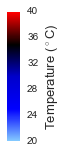

In [46]:
'''
====================
Customized colorbars
====================

This example shows how to build colorbars without an attached mappable.
'''
import matplotlib.pyplot as plt
import matplotlib as mpl

# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(0.2, 12))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = cmap
norm = mpl.colors.Normalize(vmin=20, vmax=40)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a standalone colorbar.  
# There are many more kwargs, but the following gives a basic
# continuous colorbar with ticks and labels.

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
cb1.set_label('Temperature ($^\circ$C)', fontsize=13)

plt.show()

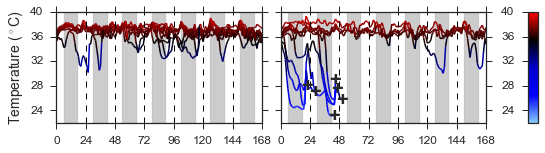

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
sns.set_context("notebook"); sns.set_style("ticks");
fig = plt.figure(figsize=(8.4, 2.2)) #Figure size 
gs1 = gridspec.GridSpec(1, 3, width_ratios=[1,1,0.1], wspace=0.13) #Ratio of upper and lower subplots

ax0 = plt.subplot(gs1[0])
#Data - WT, AP (n=9)
colorline(df5FK503['ZT'][0:10080], df5FK503['temp'][0:10080], linewidth=1.5)
colorline(df5FK504['ZT'][0:10080], df5FK504['temp'][0:10080], linewidth=1.5)
colorline(df5FK536['ZT'][0:10080], df5FK536['temp'][0:10080], linewidth=1.5)
colorline(df5FK537['ZT'][0:10080], df5FK537['temp'][0:10080], linewidth=1.5)
colorline(df5FK544['ZT'][0:10080], df5FK544['temp'][0:10080], linewidth=1.5)
colorline(df5FKalb177['ZT'][0:10080], df5FKalb177['temp'][0:10080], linewidth=1.5)
colorline(df5FKalb179['ZT'][0:10080], df5FKalb179['temp'][0:10080], linewidth=1.5)
colorline(df5FKalb202['ZT'][0:10080], df5FKalb202['temp'][0:10080], linewidth=1.5)
colorline(df5FKalb230['ZT'][0:10080], df5FKalb230['temp'][0:10080], linewidth=1.5)
ax0.tick_params(labelsize=12)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
plt.ylabel('Temperature ($^\circ$C)', fontsize=14)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);
ax0.axvspan(54,66,color='k',alpha=0.2); ax0.axvspan(78,90, color='k', alpha=0.2)
ax0.axvspan(102,114,color='k',alpha=0.2);ax0.axvspan(126,138,color='k',alpha=0.2);
ax0.axvspan(150,162,color='k',alpha=0.2); 
ax0.yaxis.set_ticks(np.arange(24.0,42.01,4.0))
ax0.set_ylim(22.0,40.0); ax0.set_xlim(0,168)

ax1 = plt.subplot(gs1[1])
#Data - KMO albcre, AP n=10
colorline(df5A226['ZT'][0:10080], df5A226['temp'][0:10080], linewidth=1.5)
colorline(df5A235['ZT'][0:10080], df5A235['temp'][0:10080], linewidth=1.5)
colorline(df5A238['ZT'][0:10080], df5A238['temp'][0:10080], linewidth=1.5)
colorline(df5A241['ZT'][0:10080], df5A241['temp'][0:10080], linewidth=1.5)
colorline(df5A244['ZT'][0:10080], df5A244['temp'][0:10080], linewidth=1.5)
colorline(df5A246['ZT'][0:10080], df5A246['temp'][0:10080], linewidth=1.5)
colorline(df5A265['ZT'][0:10080], df5A265['temp'][0:10080], linewidth=1.5)
colorline(df5A272['ZT'][0:10080], df5A272['temp'][0:10080], linewidth=1.5)
colorline(df5A280['ZT'][0:10080], df5A280['temp'][0:10080], linewidth=1.5)
colorline(df5A281['ZT'][0:10080], df5A281['temp'][0:10080], linewidth=1.5)
ax1.tick_params(labelsize=12)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
ax1.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax1.axvspan(6,18, color='k', alpha=0.2);ax1.axvspan(30,42, color='k', alpha=0.2);
ax1.axvspan(54,66, color='k', alpha=0.2);ax1.axvspan(78,90, color='k', alpha=0.2);
ax1.axvspan(102,114, color='k', alpha=0.2);ax1.axvspan(126,138, color='k', alpha=0.2);
ax1.axvspan(150,162, color='k', alpha=0.2)
ax1.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax1.yaxis.set_ticklabels([])
ax1.set_ylim(22.0, 40.0); ax1.set_xlim(0, 168)

ax1.text(50, 25.6, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax1.text(46, 27.5, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax1.text(44.9, 28.95, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax1.text(44, 23.1, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax1.text(27.9, 27.0, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')
ax1.text(22, 28, "+", ha="center", va="center", rotation=0, size=20, fontweight='bold')

ax2 = plt.subplot(gs1[2])
norm = mpl.colors.Normalize(vmin=22, vmax=40)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
ax2.yaxis.set_ticks_position('left')
ax2.tick_params(labelsize=12)
plt.subplots_adjust(bottom=0.2, wspace = 0.1)
ax2.set_position([0.904,0.20, 0.017, 0.70]) #More Right, MoreUp, MoreWidth
#plt.savefig('Temps_7day_03jan18_AP.png', dpi=1000)
plt.show()

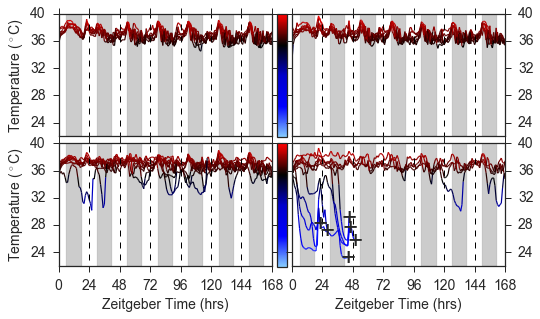

In [182]:
sns.set_context("notebook"); sns.set_style("ticks"); fig = plt.figure(figsize=(8.0, 5.0)) 
gs1 = gridspec.GridSpec(2, 3, width_ratios=[1,0.08,1], wspace=0.01, hspace=0.06)

ax0 = plt.subplot(gs1[0]);ax0.tick_params(labelsize=12)
colorline(df5FK502['ZT'][0:10080], df5FK502['temp'][0:10080], linewidth=1.2)
colorline(df5FK534['ZT'][0:10080], df5FK534['temp'][0:10080], linewidth=1.2)
colorline(df5FK535['ZT'][0:10080], df5FK535['temp'][0:10080], linewidth=1.2)
colorline(df5FK545['ZT'][0:10080], df5FK545['temp'][0:10080], linewidth=1.2)
colorline(df5FKalb180['ZT'][0:10080], df5FKalb180['temp'][0:10080], linewidth=1.2)
colorline(df5FKalb205['ZT'][0:10080], df5FKalb205['temp'][0:10080], linewidth=1.2)
colorline(df5FKalb229['ZT'][0:10080], df5FKalb229['temp'][0:10080], linewidth=1.2)
ax0.tick_params(labelsize=14)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
plt.ylabel('Temperature ($^\circ$C)', fontsize=14)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);
ax0.axvspan(54,66,color='k',alpha=0.2); ax0.axvspan(78,90, color='k', alpha=0.2)
ax0.axvspan(102,114,color='k',alpha=0.2);ax0.axvspan(126,138,color='k',alpha=0.2);
ax0.axvspan(150,162,color='k',alpha=0.2); 
ax0.yaxis.set_ticks(np.arange(24.0,42.01,4.0))
ax0.set_ylim(22.0,40.0); ax0.set_xlim(0,168); ax0.xaxis.set_ticklabels([])

ax1 = plt.subplot(gs1[1])
norm = mpl.colors.Normalize(vmin=22, vmax=40)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='vertical', ticks=[20,24,28,32,36,40])
ax1.yaxis.set_ticks_position('none')
ax1.yaxis.set_ticklabels([]);ax1.tick_params(labelsize=12)
plt.subplots_adjust(bottom=0.2, wspace = 0.01)
ax1.set_position([0.504, 0.558, 0.017, 0.342]) #More Right, MoreUp, MoreWidth, More Height

ax2 = plt.subplot(gs1[2]); ax2.tick_params(labelsize=12) #Data - KMO albcre, Sham (n=7/7)
colorline(df5A227['ZT'][0:10080], df5A227['temp'][0:10080], linewidth=1.2)
colorline(df5A234['ZT'][0:10080], df5A234['temp'][0:10080], linewidth=1.2)
colorline(df5A243['ZT'][0:10080], df5A243['temp'][0:10080], linewidth=1.2)
colorline(df5A252['ZT'][0:10080], df5A252['temp'][0:10080], linewidth=1.2)
colorline(df5A253['ZT'][0:10080], df5A253['temp'][0:10080], linewidth=1.2)
colorline(df5A270['ZT'][0:10080], df5A270['temp'][0:10080], linewidth=1.2)
colorline(df5A282['ZT'][0:10080], df5A282['temp'][0:10080], linewidth=1.2)
ax2.tick_params(labelsize=14)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.axvspan(6,18, color='k', alpha=0.2);ax2.axvspan(30,42, color='k', alpha=0.2);
ax2.axvspan(54,66, color='k', alpha=0.2);ax2.axvspan(78,90, color='k', alpha=0.2);
ax2.axvspan(102,114, color='k', alpha=0.2);ax2.axvspan(126,138, color='k', alpha=0.2);
ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax2.set_ylim(22.0, 40.0); ax2.set_xlim(0, 168)
ax2.xaxis.set_ticklabels([]);ax2.yaxis.tick_right();ax2.yaxis.set_ticks_position('both')

ax3 = plt.subplot(gs1[3]); ax3.tick_params(labelsize=12)
colorline(df5FK503['ZT'][0:10080], df5FK503['temp'][0:10080], linewidth=1.2)
colorline(df5FK504['ZT'][0:10080], df5FK504['temp'][0:10080], linewidth=1.2)
colorline(df5FK536['ZT'][0:10080], df5FK536['temp'][0:10080], linewidth=1.2)
colorline(df5FK537['ZT'][0:10080], df5FK537['temp'][0:10080], linewidth=1.2)
colorline(df5FK544['ZT'][0:10080], df5FK544['temp'][0:10080], linewidth=1.2)
colorline(df5FKalb177['ZT'][0:10080], df5FKalb177['temp'][0:10080], linewidth=1.2)
colorline(df5FKalb179['ZT'][0:10080], df5FKalb179['temp'][0:10080], linewidth=1.2)
colorline(df5FKalb202['ZT'][0:10080], df5FKalb202['temp'][0:10080], linewidth=1.2)
colorline(df5FKalb230['ZT'][0:10080], df5FKalb230['temp'][0:10080], linewidth=1.2)
ax3.tick_params(labelsize=14)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
plt.ylabel('Temperature ($^\circ$C)', fontsize=14)
plt.xlabel('Zeitgeber Time (hrs)', fontsize=14)
ax3.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax3.axvspan(6,18,color='k',alpha=0.2);ax3.axvspan(30,42,color='k',alpha=0.2);
ax3.axvspan(54,66,color='k',alpha=0.2);ax3.axvspan(78,90, color='k', alpha=0.2);
ax3.axvspan(102,114,color='k',alpha=0.2);ax3.axvspan(126,138,color='k',alpha=0.2);
ax3.axvspan(150,162,color='k',alpha=0.2);
ax3.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax3.set_ylim(22.0, 40.0); ax3.set_xlim(0, 168)

ax4 = plt.subplot(gs1[4])
cb2 = mpl.colorbar.ColorbarBase(ax4, cmap=cmap, norm=norm, orientation='vertical', ticks=[0,10,20,30,40]) 
ax4.yaxis.set_ticks_position('none'); ax4.yaxis.set_ticklabels([]); ax4.tick_params(labelsize=12)
ax4.set_position([0.504, 0.198, 0.017, 0.342]) #More Right, MoreUp, MoreWidth, More Height

ax5 = plt.subplot(gs1[5]); ax5.tick_params(labelsize=12)
colorline(df5A226['ZT'][0:10080], df5A226['temp'][0:10080], linewidth=1.2)
colorline(df5A235['ZT'][0:10080], df5A235['temp'][0:10080], linewidth=1.2)
colorline(df5A238['ZT'][0:10080], df5A238['temp'][0:10080], linewidth=1.2)   #Survivor
colorline(df5A241['ZT'][0:10080], df5A241['temp'][0:10080], linewidth=1.2)   #Survivor
colorline(df5A244['ZT'][0:10080], df5A244['temp'][0:10080], linewidth=1.2)   #Survivor
colorline(df5A246['ZT'][0:10080], df5A246['temp'][0:10080], linewidth=1.2)
colorline(df5A265['ZT'][0:10080], df5A265['temp'][0:10080], linewidth=1.2)
colorline(df5A272['ZT'][0:10080], df5A272['temp'][0:10080], linewidth=1.2)
colorline(df5A280['ZT'][0:10080], df5A280['temp'][0:10080], linewidth=1.2)   #Survivor
colorline(df5A281['ZT'][0:10080], df5A281['temp'][0:10080], linewidth=1.2)
ax5.tick_params(labelsize=14)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
plt.xlabel('Zeitgeber Time (hrs)', fontsize=14)
ax5.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax5.axvspan(6,18,color='k',alpha=0.2);ax5.axvspan(30,42,color='k',alpha=0.2);
ax5.axvspan(54,66,color='k',alpha=0.2);ax5.axvspan(78,90, color='k', alpha=0.2)
ax5.axvspan(102,114,color='k',alpha=0.2);ax5.axvspan(126,138,color='k',alpha=0.2);
ax5.axvspan(150,162,color='k',alpha=0.2);
ax5.yaxis.set_ticks(np.arange(24.0, 42.01, 4.0))
ax5.set_ylim(22.0, 40.0); ax5.set_xlim(0, 168)
ax5.yaxis.tick_right(); ax5.yaxis.set_ticks_position('both')
ax5.text(50, 25.6, "+", ha="center", va="center", rotation=0, size=26)   #A226
ax5.text(46, 27.5, "+", ha="center", va="center", rotation=0, size=26)   #A246
ax5.text(44.9, 28.95, "+", ha="center", va="center", rotation=0, size=26) #A272
ax5.text(44, 23.1, "+", ha="center", va="center", rotation=0, size=26)    #A235
ax5.text(27.9, 27.0, "+", ha="center", va="center", rotation=0, size=26)  #A281
ax5.text(22, 28, "+", ha="center", va="center", rotation=0, size=26)     #A265
#plt.savefig('Fig3A_21may18.png', dpi=600)
plt.show()

In [183]:
# Topics: line, color, LineCollection, cmap, colorline, codex
'''
Defines a function colorline that draws a (multi-)colored 2D line with coordinates x and y.
The color is taken from optional data in z, and creates a LineCollection.

z can be:
- empty, in which case a default coloring will be used based on the position along the input arrays
- a single number, for a uniform color [this can also be accomplished with the usual plt.plot]
- an array of the length of at least the same length as x, to color according to this data
- an array of a smaller length, in which case the colors are repeated along the curve

The function colorline returns the LineCollection created, which can be modified afterwards.

See also: plt.streamplot
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

#cmap2='brg'
#cmap2='gnuplot2'
#cmap2='GnBu'
#cmap2='cool'
#cmap2='jet'
#cmap2='nipy_spectral'
#cmap2=plt.get_cmap('viridis')
cmap2 = mpl.colors.ListedColormap(['g', 'b', '#FFFF00', 'k'])
#cmap2 = mpl.colors.ListedColormap(['b', 'g', 'y', 'r'])
#cmap2 = sns.palplot(sns.cubehelix_palette(8))
#cmap2 = 'ocean'

# Data manipulation:
def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments

# Interface to LineCollection:
def colorline2(x, y, z=None, cmap=cmap2, norm=plt.Normalize(0,40), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(y))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(y)
    
    segments = make_segments(x, y)
    lc2 = LineCollection(segments, array=z, cmap=cmap2, norm=plt.Normalize(0,40), linewidth=linewidth, alpha=alpha)
    
    ax1 = plt.gca()
    ax1.add_collection(lc2)
    
    return lc2
        
def clear_frame(ax1=None):
    if ax1 is None: 
        ax1 = plt.gca() 
    ax1.xaxis.set_visible(False) 
    ax1.yaxis.set_visible(False) 
    for spine in ax1.spines.itervalues(): 
        spine.set_visible(False)

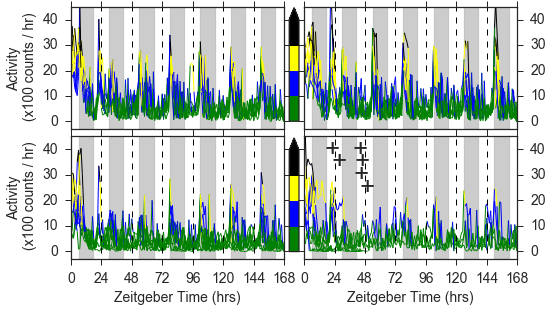

In [217]:
sns.set_context("notebook"); sns.set_style("ticks"); fig = plt.figure(figsize=(8.0, 5.0)) 
gs1 = gridspec.GridSpec(2, 3, width_ratios=[1,0.08,1], wspace=0.01, hspace=0.06)

ax0 = plt.subplot(gs1[0]);ax0.tick_params(labelsize=12) #Data - WT, Sham (n=7/7)
colorline2(df5FK502['ZT'][0:10080], df5FK502['actHund'][0:10080], linewidth=1)
colorline2(df5FK534['ZT'][0:10080], df5FK534['actHund'][0:10080], linewidth=1)
colorline2(df5FK535['ZT'][0:10080], df5FK535['actHund'][0:10080], linewidth=1)
colorline2(df5FK545['ZT'][0:10080], df5FK545['actHund'][0:10080], linewidth=1)
colorline2(df5FKalb180['ZT'][0:10080], df5FKalb180['actHund'][0:10080], linewidth=1)
colorline2(df5FKalb205['ZT'][0:10080], df5FKalb205['actHund'][0:10080], linewidth=1)
colorline2(df5FKalb229['ZT'][0:10080], df5FKalb229['actHund'][0:10080], linewidth=1)

ax0.tick_params(labelsize=14)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
plt.ylabel('Activity\n (x100 counts / hr)', fontsize=14)
ax0.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax0.axvspan(6,18,color='k',alpha=0.2);ax0.axvspan(30,42,color='k',alpha=0.2);
ax0.axvspan(54,66,color='k',alpha=0.2); ax0.axvspan(78,90, color='k', alpha=0.2)
ax0.axvspan(102,114,color='k',alpha=0.2);ax0.axvspan(126,138,color='k',alpha=0.2);
ax0.axvspan(150,162,color='k',alpha=0.2); 
ax0.yaxis.set_ticks(np.arange(0,50,10));ax0.set_ylim(-3,45); ax0.set_xlim(0,168);ax0.xaxis.set_ticklabels([])

ax1 = plt.subplot(gs1[1])
norm2 = mpl.colors.Normalize(vmin=0, vmax=40)
cb2 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap2, norm=norm2, orientation='vertical', ticks=[0,10,20,30,40], 
                                extend='max', extendfrac=0.12)
ax1.yaxis.set_ticks_position('none')
ax1.yaxis.set_ticklabels([]); ax1.tick_params(labelsize=12)
plt.subplots_adjust(bottom=0.2, wspace = 0.01)
ax1.set_position([0.504, 0.582, 0.017, 0.316]) #More Right, MoreUp, MoreWidth, More Height

ax2 = plt.subplot(gs1[2]); ax2.tick_params(labelsize=12) #Data - KMO albcre, Sham (n=7/7)
colorline2(df5A227['ZT'][0:10080], df5A227['actHund'][0:10080], linewidth=1)
colorline2(df5A234['ZT'][0:10080], df5A234['actHund'][0:10080], linewidth=1)
colorline2(df5A243['ZT'][0:10080], df5A243['actHund'][0:10080], linewidth=1)
colorline2(df5A252['ZT'][0:10080], df5A252['actHund'][0:10080], linewidth=1)
colorline2(df5A253['ZT'][0:10080], df5A253['actHund'][0:10080], linewidth=1)
colorline2(df5A270['ZT'][0:10080], df5A270['actHund'][0:10080], linewidth=1)
colorline2(df5A282['ZT'][0:10080], df5A282['actHund'][0:10080], linewidth=1)
ax2.tick_params(labelsize=14)
plt.plot([24, 24], [20, 50], 'k--', lw=1); plt.plot([48, 48], [20, 50], 'k--', lw=1)
plt.plot([72, 72], [20, 50], 'k--', lw=1); plt.plot([96, 96], [20, 50], 'k--', lw=1)
plt.plot([120, 120], [20, 50], 'k--', lw=1); plt.plot([144, 144], [20, 50], 'k--', lw=1)
ax2.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax2.axvspan(6,18, color='k', alpha=0.2);ax2.axvspan(30,42, color='k', alpha=0.2);
ax2.axvspan(54,66, color='k', alpha=0.2);ax2.axvspan(78,90, color='k', alpha=0.2);
ax2.axvspan(102,114, color='k', alpha=0.2);ax2.axvspan(126,138, color='k', alpha=0.2);
ax2.axvspan(150,162, color='k', alpha=0.2)
ax2.yaxis.set_ticks(np.arange(0,50,10))
ax2.set_ylim(-3,45); ax2.set_xlim(0,168)
ax2.xaxis.set_ticklabels([]);ax2.yaxis.tick_right();ax2.yaxis.set_ticks_position('both')

ax3 = plt.subplot(gs1[3]); ax3.tick_params(labelsize=12)
colorline2(df5FK503['ZT'][0:10080], df5FK503['actHund'][0:10080], linewidth=1)
colorline2(df5FK504['ZT'][0:10080], df5FK504['actHund'][0:10080], linewidth=1)
colorline2(df5FK536['ZT'][0:10080], df5FK536['actHund'][0:10080], linewidth=1)
colorline2(df5FK537['ZT'][0:10080], df5FK537['actHund'][0:10080], linewidth=1)
colorline2(df5FK544['ZT'][0:10080], df5FK544['actHund'][0:10080], linewidth=1)
colorline2(df5FKalb177['ZT'][0:10080], df5FKalb177['actHund'][0:10080], linewidth=1)
colorline2(df5FKalb179['ZT'][0:10080], df5FKalb179['actHund'][0:10080], linewidth=1)
colorline2(df5FKalb202['ZT'][0:10080], df5FKalb202['actHund'][0:10080], linewidth=1)
colorline2(df5FKalb230['ZT'][0:10080], df5FKalb230['actHund'][0:10080], linewidth=1)
ax3.tick_params(labelsize=14)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
plt.ylabel('Activity\n (x100 counts / hr)', fontsize=14)
plt.xlabel('Zeitgeber Time (hrs)', fontsize=14)
ax3.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax3.axvspan(6,18,color='k',alpha=0.2);ax3.axvspan(30,42,color='k',alpha=0.2);
ax3.axvspan(54,66,color='k',alpha=0.2);ax3.axvspan(78,90, color='k', alpha=0.2);
ax3.axvspan(102,114,color='k',alpha=0.2);ax3.axvspan(126,138,color='k',alpha=0.2);
ax3.axvspan(150,162,color='k',alpha=0.2);
ax3.yaxis.set_ticks(np.arange(0,50,10))
ax3.set_ylim(-3,45); ax3.set_xlim(0,168)

ax4 = plt.subplot(gs1[4])
cb2 = mpl.colorbar.ColorbarBase(ax4, cmap=cmap2, norm=norm2, orientation='vertical', ticks=[0,10,20,30,40], 
                                extend='max', extendfrac=0.12) 
ax4.yaxis.set_ticks_position('none'); ax4.yaxis.set_ticklabels([]); ax4.tick_params(labelsize=12)
ax4.set_position([0.504, 0.220, 0.017, 0.316]) #More Right, MoreUp, MoreWidth, More Height

ax5 = plt.subplot(gs1[5]); ax5.tick_params(labelsize=12)
colorline2(df5A226['ZT'][0:10080], df5A226['actHund'][0:10080], linewidth=1)
colorline2(df5A235['ZT'][0:10080], df5A235['actHund'][0:10080], linewidth=1)
colorline2(df5A238['ZT'][0:10080], df5A238['actHund'][0:10080], linewidth=1)  #Survivor
colorline2(df5A241['ZT'][0:10080], df5A241['actHund'][0:10080], linewidth=1)  #Survivor
colorline2(df5A244['ZT'][0:10080], df5A244['actHund'][0:10080], linewidth=1)  #Survivor
colorline2(df5A246['ZT'][0:10080], df5A246['actHund'][0:10080], linewidth=1)
colorline2(df5A265['ZT'][0:10080], df5A265['actHund'][0:10080], linewidth=1)
colorline2(df5A272['ZT'][0:10080], df5A272['actHund'][0:10080], linewidth=1)
colorline2(df5A280['ZT'][0:10080], df5A280['actHund'][0:10080], linewidth=1)  #Survivor
colorline2(df5A281['ZT'][0:10080], df5A281['actHund'][0:10080], linewidth=1)
ax5.tick_params(labelsize=14)
plt.plot([24, 24], [-1000, 5000], 'k--', lw=1); plt.plot([48, 48], [-1000, 5000], 'k--', lw=1)
plt.plot([72, 72], [-1000, 5000], 'k--', lw=1); plt.plot([96, 96], [-1000, 5000], 'k--', lw=1)
plt.plot([120, 120], [-1000, 5000], 'k--', lw=1); plt.plot([144, 144], [-1000, 5000], 'k--', lw=1)
plt.xlabel('Zeitgeber Time (hrs)', fontsize=14)
ax5.set_xticks([0, 24, 48, 72, 96, 120, 144, 168])
ax5.axvspan(6,18,color='k',alpha=0.2);ax5.axvspan(30,42,color='k',alpha=0.2);
ax5.axvspan(54,66,color='k',alpha=0.2);ax5.axvspan(78,90, color='k', alpha=0.2)
ax5.axvspan(102,114,color='k',alpha=0.2);ax5.axvspan(126,138,color='k',alpha=0.2);
ax5.axvspan(150,162,color='k',alpha=0.2);
ax5.yaxis.set_ticks(np.arange(0,50,10))
ax5.set_ylim(-3,45); ax5.set_xlim(0,168)
ax5.yaxis.tick_right(); ax5.yaxis.set_ticks_position('both')
ax5.text(50, 25, "+", ha="center", va="center", rotation=0, size=26)   #A226
ax5.text(46, 35, "+", ha="center", va="center", rotation=0, size=26)   #A246
ax5.text(44.9, 30, "+", ha="center", va="center", rotation=0, size=26) #A272
ax5.text(44, 40, "+", ha="center", va="center", rotation=0, size=26)    #A235
ax5.text(27.9, 35, "+", ha="center", va="center", rotation=0, size=26)  #A281
ax5.text(22, 40, "+", ha="center", va="center", rotation=0, size=26)     #A265
plt.savefig('Fig3B_21may18.png', dpi=600)
plt.show()